In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd

In [8]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [29]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [41]:
# Calculate the date 1 year ago from the last data point in the database
dt.date(latestYear, latestMonth, latestDay) - dt.timedelta(days=365)

datetime.date(2016, 8, 23)

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
last_12_months_precipitation=prcp_results
last_12_months_precipitation

[('2016-08-01', 0.08),
 ('2016-08-02', 0.05),
 ('2016-08-03', 0.0),
 ('2016-08-04', 0.04),
 ('2016-08-05', 0.01),
 ('2016-08-06', 0.0),
 ('2016-08-07', 0.39),
 ('2016-08-08', 0.02),
 ('2016-08-09', 0.0),
 ('2016-08-10', 0.0),
 ('2016-08-11', 0.0),
 ('2016-08-12', 0.0),
 ('2016-08-13', 0.0),
 ('2016-08-14', 0.0),
 ('2016-08-15', 0.0),
 ('2016-08-16', 0.0),
 ('2016-08-17', 0.0),
 ('2016-08-18', 0.0),
 ('2016-08-19', 0.04),
 ('2016-08-20', 0.0),
 ('2016-08-21', 0.12),
 ('2016-08-22', 0.4),
 ('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14

In [77]:
# Perform a query to retrieve the data and precipitation scores
session.query(Measurement.prcp).all()

[(0.08),
 (0.0),
 (0.0),
 (0.0),
 (None),
 (0.06),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.04),
 (0.12),
 (0.0),
 (None),
 (0.03),
 (0.01),
 (None),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.02),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (None),
 (0.03),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.0),
 (0.12),
 (0.08),
 (0.03),
 (0.0),
 (0.43),
 (0.06),
 (None),
 (0.0),
 (0.0),
 (0.0),
 (0.06),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (None),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.17),
 (0.15),
 (0.27),
 (0.01),
 (0.0),
 (0.01),
 (0.0),
 (0.01),
 (0.01),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.04),
 (0.01),
 (0.0),
 (0.02),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.03),
 (0.2),
 (0.08),
 (0.01),
 (0.0),
 (0.05),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.03),
 (0.0)

In [85]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcpTable = pd.DataFrame(prcp_results)
prcpTable = prcpTable.set_index('date')

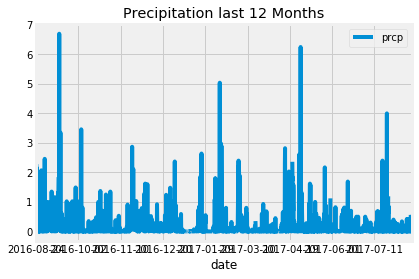

In [86]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
last_12_months_precipitation=prcp_results
last_12_months_precipitation

# Calculate the date 1 year ago from the last data point in the database
dt.date(latestYear, latestMonth, latestDay) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
session.query(Measurement.prcp).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcpTable = pd.DataFrame(prcp_results)
prcpTable = prcpTable.set_index('date')

# Sort the dataframe by date
prcpTable = rainTable.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcpTable.plot(title="Precipitation last 12 Months")

![precipitation](Images/precipitation.png)

In [88]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpTable.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [16]:
# Design a query to show how many stations are available in this dataset?
stationsCount = session.query(Station).count()
print(f"Station Count: {stationsCount}")

Station Count: 9


In [91]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationCounts = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
stationCounts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [101]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowestTemp = (session.query(Measurement.tobs)
                     .filter(Measurement.station == stationID)
                     .order_by(Measurement.tobs.asc())
                     .first())
lowestTemp = lowestTemp[0]
print(f"The lowest temperature recorded was {lowestTemp}")
highestTemp = (session.query(Measurement.tobs)
                      .filter(Measurement.station == stationID)
                      .order_by(Measurement.tobs.desc())
                      .first())
highestTemp = highestTemp[0]
print(f"The highest temperature recorded was {highestTemp}")
#query for average temperature
avgTemp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == stationID))
avgTemp = '{0:.3}'.format(avgTemp[0][0])
print(f"The average temperature recorded is {avgTemp}")

The lowest temperature recorded was 54.0
The highest temperature recorded was 85.0
The average temperature recorded is 71.7


In [102]:
#set the most active station
stationID = stationCounts[0][0]

#query for station name
stationName = (session.query(Station.name)
                      .filter_by(station = stationID))
stationName = stationName[0][0]
print(f"The most active station is {stationID}: {stationName}.")


The most active station is USC00519281: WAIHEE 837.5, HI US.


In [124]:
highestTemp = (session.query(Measurement.tobs)
                      .filter(Measurement.station == stationID)
                      .order_by(Measurement.tobs.desc())
                      .first())
highestTemp = highestTemp[0]
print(f"{stationName}.") func.max

W.


In [127]:
stationName = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
last_12_months_precipitation=stationName
last_12_months_precipitation

[('2016-08-01', 0.08),
 ('2016-08-02', 0.05),
 ('2016-08-03', 0.0),
 ('2016-08-04', 0.04),
 ('2016-08-05', 0.01),
 ('2016-08-06', 0.0),
 ('2016-08-07', 0.39),
 ('2016-08-08', 0.02),
 ('2016-08-09', 0.0),
 ('2016-08-10', 0.0),
 ('2016-08-11', 0.0),
 ('2016-08-12', 0.0),
 ('2016-08-13', 0.0),
 ('2016-08-14', 0.0),
 ('2016-08-15', 0.0),
 ('2016-08-16', 0.0),
 ('2016-08-17', 0.0),
 ('2016-08-18', 0.0),
 ('2016-08-19', 0.04),
 ('2016-08-20', 0.0),
 ('2016-08-21', 0.12),
 ('2016-08-22', 0.4),
 ('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14

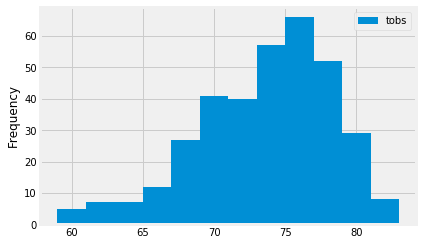

In [130]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > yearBefore)
                   .filter(Measurement.station == stationID)
                   .order_by(Measurement.date)
                   .all())

temp_table = pd.DataFrame(temp_data)
temp_table = temp_table.set_index('date')


temp_table = temp_table.sort_index(ascending=True)


temp_table.plot(kind='hist', bins=12)

![precipitation](Images/station-histogram.png)

In [39]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
Temp=[]
start_date='2011-04-28'
end_date='2012-04-28'
def calc_temps(start_date, end_date):
    results=session.query(func.max(Measurement.tobs).label("max_tobs"), \
                          func.min(Measurement.tobs).label("min_tobs"),\
                          func.avg(Measurement.tobs).label("avg_tobs")).\
                          filter(Measurement.date.between(start_date , end_date))  
    res = results.one()
    res
    TMAX = res.max_tobs
    TMIN= res.min_tobs
    TAVG= res.avg_tobs
    Temp.append(TMAX)
    Temp.append(TMIN)
    Temp.append(TAVG)
    #print(str(TMAX))
    #print(str(TMIN))
    #print(str(TAVG))
calc_temps(start_date, end_date)
Temp

[86.0, 56.0, 72.44452608376194]

In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start_date = dt.date(2011, 4, 28)
trip_end_date = dt.date(2012, 4, 28)
last_year = dt.timedelta(days=365)
tripTemps = (calc_temps((trip_start_date-last_year), (trip_end_date-last_year)))
print(tripTemps)

62.0 68.36585365853658 74.0


/Users/danduek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


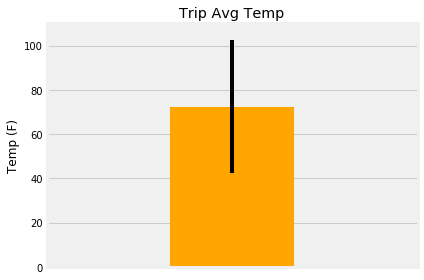

In [81]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig = plt.figure()
plt.bar( 1,TAVG, color = 'orange', yerr = TMAX-TMIN, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.show()
fig.savefig('Trip Avg Temp.png', dpi=fig.dpi)

In [113]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall = ([Station.station, 
        Station.name, 
        func.sum(Measurement.prcp),
        Station.latitude, 
        Station.longitude, 
        Station.elevation
       ])

stationRain = (session.query(*rainfall)
                   .filter(Station.station == Measurement.station)
                   .filter(Measurement.date >= tripStartDate)
                   .filter(Measurement.date <= tripEndDate)
                   .group_by(Station.station)
                   .order_by(func.sum(Measurement.prcp).desc())
                   .all())
stationRain

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  151.70000000000002,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  76.68999999999998,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  57.93999999999999,
  21.4234,
  -157.8015,
  14.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  33.18,
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  27.24,
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  22.799999999999997,
  21.2716,
  -157.8168,
  3.0),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  13.939999999999985,
  21.3152,
  -157.9992,
  0.9),
 ('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  13.570000000000002,
  21.4992,
  -158.0111,
  306.6),
 ('USC00517948',
  'PEARL CITY, HI US',
  10.909999999999997,
  21.3934,
  -157.9751,
  11.9)]

## Optional Challenge Assignment

In [115]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [146]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
startDate = "2011-04-10"
endDate = "2011-04-20"

# Use the start and end date to create a range of dates
startNumber = int(startDate[-2:])
endNumber = int(endDate[-2:])
tripLength = endNumber - startNumber + 1

# Stip off the year and save a list of %m-%d strings
startDate = dt.datetime.strptime(startDate, '%Y-%m-%d')
dateList = [dt.datetime.strftime(startDate + dt.timedelta(days = x), '%m-%d') 
            for x in range(0, tripLength)]

# Loop through the list of %m-%d strings and calculate the normals for each date
tripNormals = [daily_normals(date) for date in dateList]

tripNormals

[[(64.0, 71.40350877192982, 79.0)],
 [(65.0, 72.49180327868852, 82.0)],
 [(65.0, 72.22413793103448, 80.0)],
 [(64.0, 71.52542372881356, 79.0)],
 [(65.0, 72.75, 81.0)],
 [(61.0, 71.79310344827586, 79.0)],
 [(62.0, 71.55357142857143, 81.0)],
 [(65.0, 71.93103448275862, 77.0)],
 [(67.0, 72.49152542372882, 77.0)],
 [(65.0, 72.42105263157895, 83.0)],
 [(64.0, 72.73684210526316, 80.0)]]

In [147]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
tripNormals = [np.array(normal[0]) for normal in tripNormals]
normalsTable = pd.DataFrame(tripNormals)
normalsTable["Date"] = dateList
normalsTable = normalsTable.set_index("Date")
normalsTable = normalsTable.rename(columns={0: "Tmin", 1: "Tavg", 2: "Tmax"})

normalsTable


,Tmin,Tavg,Tmax
Date,,,
04-10,64.0,71.403509,79.0
04-11,65.0,72.491803,82.0
04-12,65.0,72.224138,80.0
04-13,64.0,71.525424,79.0
04-14,65.0,72.750000,81.0
04-15,61.0,71.793103,79.0
04-16,62.0,71.553571,81.0
04-17,65.0,71.931034,77.0
04-18,67.0,72.491525,77.0


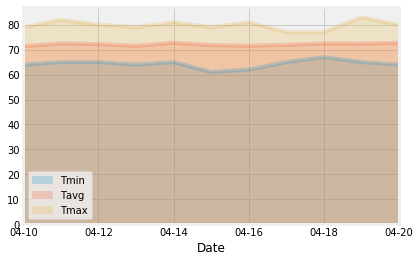

In [155]:
# Plot the daily normals as an area plot with `stacked=False`
normalsTable.plot.area(stacked=False, alpha=.222)